In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
class exp3Bandits:
    def __init__(self):
        self.losses= [0 for i in range(10)]
        self.count=[0 for i in range(10)]
        self.weights=[1 for i in range(10)]
        self.probab=[0.1 for i in range(10)]
        
    def makeprobab(self):
        wt=sum(self.weights)
        for i in range(10):
            self.probab[i]= self.weights[i]/wt    
    
    def update(self, bandit, loss,eta):
        self.losses[bandit]+=loss
        self.count[bandit]+=1
        n=self.count[bandit]
#         eta=0.057 #eta calcluated using class formula
        self.weights[bandit]=self.weights[bandit]*np.exp(-eta*loss)
        
        
    def full_upd(self,lossvect=[0,0,0,0,0,0,0,0,0,0],eta=0.057):
        for bandit in range(10):
            self.update(bandit,lossvect[bandit],eta)
            
        
    def get_losses(self):
        return self.losses
    
    def get_count(self):
        return self.count        
        
    def getwt(self):
        return self.weights
    
    def getprobab(self):
        return self.probab

In [3]:
class newBandits:
    def __init__(self):
        self.losses= [0 for i in range(10)]
        self.count=[0 for i in range(10)]
        self.measure=[0 for i in range(10)]
    
    def update(self, bandit, loss):
        self.losses[bandit]+=loss
        self.count[bandit]+=1
        n=self.count[bandit]
        new_measure=((n-1)/float(n))*self.measure[bandit]+(1/float(n))*loss
        self.measure[bandit]=new_measure
        
        
    def full_upd(self,lossvect=[0,0,0,0,0,0,0,0,0,0]):
        for bandit in range(10):
            self.update(bandit,lossvect[bandit])
            
        
    def get_losses(self):
        return self.losses
    
    def get_count(self):
        return self.count        
        
    def getval(self):
#         values=[self.measure[i] for i in range(10) ]
        return self.measure
        

In [4]:
def EXP3(n,eta):
    def loss(i):
        if i==9: return np.random.beta(5,10, 10)
        return np.random.beta(5,5, 10) #index 0 corresponds to 1
    
    def wheel(probablist):
        breaker=np.random.random()
        i=0
        sump=0
        while i<10:
            sump+=probablist[i]
            if sump>=breaker:
                return i
            i=i+1
        return i
            
    
    bandits_known=exp3Bandits()
    bandits_full=newBandits()
    i=0
    chosen=0
    losssum=0
    best_regret=0
    reglist=[0]
    
    for t in range(n):
        bandits_known.makeprobab()
        
        chosen=wheel(bandits_known.getprobab())
        losst=loss(chosen)
        losssum+=losst[chosen]
        bandits_known.update(chosen,losst[chosen],eta)
        bandits_full.full_upd(losst)
        best_regret=np.amin(bandits_full.get_losses()) #[np.argmax(losst)]
        reglist.append(losssum-best_regret)
                       
#     print(reglist)
    return(reglist)
#     return best_regret - losssum

In [5]:
EXP3(10000, 0.3)

[0,
 0.0,
 -0.028163114698609326,
 0.023544208123974286,
 0.36879871485378035,
 0.16031409281269893,
 0.1291451851221903,
 0.1291451851221903,
 0.12914518512218987,
 0.048531094135062514,
 0.21344849808851052,
 0.20898779126923994,
 0.5021484823953806,
 0.5021484823953806,
 0.6415160485484019,
 1.0050316816583598,
 0.8523696636700073,
 0.8152226209573241,
 0.6213405142559871,
 0.8118587743608163,
 0.5053284886552518,
 0.5932759807851209,
 0.7224544195198916,
 0.8744964297984765,
 0.9711362251516604,
 1.061418099805664,
 0.8933440566374102,
 1.1332464588773554,
 1.4377372894596387,
 1.2269014799125024,
 1.224612290197003,
 1.2253130364643283,
 1.1906179215687747,
 1.0972865337293953,
 1.2822616603721873,
 1.2085424786783214,
 1.3536987213012353,
 1.0785941446653524,
 0.8762436816431212,
 0.8340567818315456,
 0.8034111097132985,
 0.8543998619356188,
 1.179915929432795,
 1.1906642799233538,
 1.0673655611010773,
 0.9634555842779484,
 1.1663869247287302,
 1.204737782332856,
 1.3047183836637

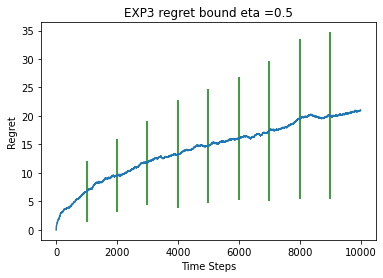

In [15]:
EXP3_mean=np.array([0.0 for i in range(10001)])
EXP3_std=np.array([0.0 for i in range(10001)])
EXP_err=np.array([0.0 for i in range(10001)])
#____________________________________


for i in range(100):
    cat=np.array(EXP3(10000,0.5))
    EXP3_mean+=cat
    EXP3_std+=cat**2
EXP3_mean=EXP3_mean/100
EXP3_std=np.sqrt(EXP3_std/100-EXP3_mean**2)
for i in range(10000):
    if i%1000==0:
        EXP_err[i]=EXP3_std[i]
x = np.array(range(10001))

# plt.plot(EXP3_mean)
plt.errorbar( x, EXP3_mean, yerr=EXP_err, ecolor=['green'])
# plt.show()
plt.xlabel('Time Steps')
plt.ylabel('Regret')
plt.title("EXP3 regret bound eta =0.5")
# plt.legend(loc='best')
plt.show()

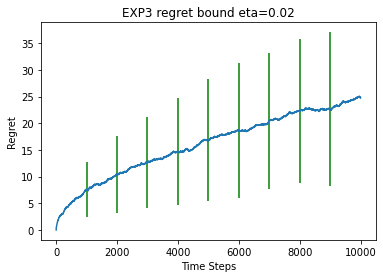

In [16]:
EXP3_mean=np.array([0.0 for i in range(10001)])
EXP3_std=np.array([0.0 for i in range(10001)])
EXP_err=np.array([0.0 for i in range(10001)])
#____________________________________


for i in range(100):
    cat=np.array(EXP3(10000,0.002))
    EXP3_mean+=cat
    EXP3_std+=cat**2
EXP3_mean=EXP3_mean/100
EXP3_std=np.sqrt(EXP3_std/100-EXP3_mean**2)
for i in range(10000):
    if i%1000==0:
        EXP_err[i]=EXP3_std[i]
x = np.array(range(10001))

# plt.plot(EXP3_mean)
plt.errorbar( x, EXP3_mean, yerr=EXP_err, ecolor=['green'])
# plt.show()
plt.xlabel('Time Steps')
plt.ylabel('Regret')
plt.title("EXP3 regret bound eta=0.02")
# plt.legend(loc='best')
plt.show()

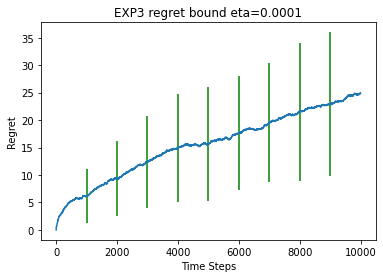

In [21]:
EXP3_mean=np.array([0.0 for i in range(10001)])
EXP3_std=np.array([0.0 for i in range(10001)])
EXP_err=np.array([0.0 for i in range(10001)])
#____________________________________


for i in range(100):
    cat=np.array(EXP3(10000,0.0001))
    EXP3_mean+=cat
    EXP3_std+=cat**2
EXP3_mean=EXP3_mean/100
EXP3_std=np.sqrt(EXP3_std/100-EXP3_mean**2)
for i in range(10000):
    if i%1000==0:
        EXP_err[i]=EXP3_std[i]
x = np.array(range(10001))

# plt.plot(EXP3_mean)
plt.errorbar( x, EXP3_mean, yerr=EXP_err, ecolor=['green'])
# plt.show()
plt.xlabel('Time Steps')
plt.ylabel('Regret')
plt.title("EXP3 regret bound eta=0.0001")
# plt.legend(loc='best')
plt.show()

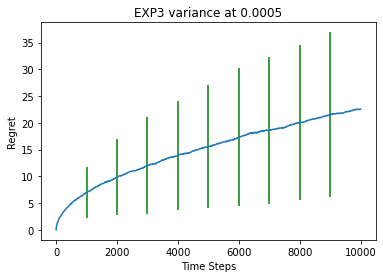

In [22]:
EXP3_mean=np.array([0.0 for i in range(10001)])
EXP3_std=np.array([0.0 for i in range(10001)])
EXP_err=np.array([0.0 for i in range(10001)])
#____________________________________


for i in range(1000):
    cat=np.array(EXP3(10000,0.0005))
    EXP3_mean+=cat
    EXP3_std+=cat**2
EXP3_mean=EXP3_mean/1000
EXP3_std=np.sqrt(EXP3_std/1000-EXP3_mean**2)
for i in range(10000):
    if i%1000==0:
        EXP_err[i]=EXP3_std[i]
x = np.array(range(10001))

# plt.plot(EXP3_mean)
plt.errorbar( x, EXP3_mean, yerr=EXP_err, ecolor=['green'])
# plt.show()
plt.xlabel('Time Steps')
plt.ylabel('Regret')
plt.title("EXP3 variance at 0.0005")
# plt.legend(loc='best')
plt.show()

In [17]:
np.array(a)+np.array(b)/4

NameError: name 'a' is not defined

In [19]:
la=1/np.sqrt(10000)

In [20]:
la

0.01

In [ ]:
np.linspace(0,10,10)